Most of the code comes from a sample from the book:
https://livebook.manning.com/book/deep-learning-with-python-second-edition


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

If you check the shape, you see that we have a training set of 60000 samples, with each a matrix of 28 by 28 data points (pixels). Every pixel has a value from 0 to 255. The train labels contain the numbers that have been written.

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

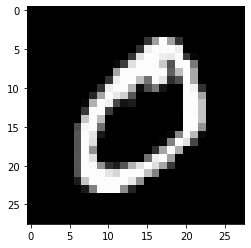

In [5]:
digit = train_images[1]
fig = plt.figure
plt.imshow(digit, cmap='gray')
plt.show()

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [16]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [20]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0287 - accuracy: 0.9914
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0225 - accuracy: 0.9933
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0174 - accuracy: 0.9951
Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0132 - accuracy: 0.9965
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0099 - accuracy: 0.9971
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0079 - accuracy: 0.9977
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0066 - accuracy: 0.9982
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0051 - accuracy: 0.9987
Epoch 9/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0038 - accuracy: 0.9989
Epoch 10/10
60

In [21]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([6.8828927e-15, 3.4283542e-19, 1.3484812e-11, 4.2513650e-09,
       1.0731446e-18, 3.5801972e-14, 5.0500055e-21, 1.0000000e+00,
       2.4547610e-11, 8.1298857e-11], dtype=float32)

In [22]:
predictions[0].argmax()

7

In [23]:
predictions[0][7]

1.0

In [24]:
test_labels[0]

7

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [26]:
print(f"test accuracy: {test_acc}, train accuracy: {history.history['accuracy'][4]}")

test accuracy: 0.9836000204086304, train accuracy: 0.9971333146095276
